# Data Science Project: Marketing Campaign 

## Kapitel 0: Libraries & Packages

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Kapitel 1: Data Source

In [6]:
data=pd.read_csv('marketing_campaign.csv',sep='\t')

https://www.kaggle.com/rodsaldanha/arketing-campaign

### Field Definition

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household

Teenhome - number of teenagers in customer’s household

Income - customer’s yearly household income

MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase

## Kapitel 2: Data Exploration

Daten Exploration bzw. Visualisieren um Outliers zu identifizieren

#### Anzahl der Spalten und Zeilen

In [7]:
print(data.shape[0],"Zeilen",'X',data.shape[1],"Spalten")


2240 Zeilen X 29 Spalten


In [8]:
pd.set_option('display.max_columns', None) # Um alle 29 Felder zu zeigen
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [9]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Spalte 1: ID

In [10]:
print("ID hat",data['ID'].unique().shape[0],"eindeutige Werte aus 2240 Zeilen bzw. Werten. ID hat also keine Duplikate")

ID hat 2240 eindeutige Werte aus 2240 Zeilen bzw. Werten. ID hat also keine Duplikate


#### Spalte 2: Year Birth

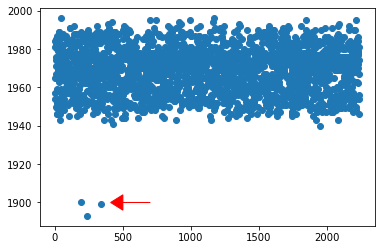

In [11]:
plt.scatter(range(2240),data['Year_Birth'])
plt.arrow(700, 1900, -200, 0,head_width=8,head_length=90,color='r') # Pfeil um Outliers zu zeigen
plt.show()

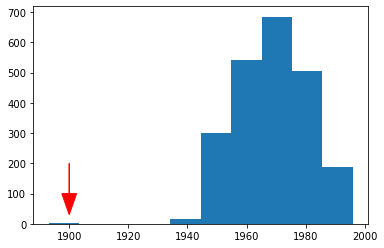

In [12]:
plt.hist(data['Year_Birth'])
plt.arrow(1900, 200, 0, -100,head_width=5,head_length=70,color='r') # Pfeil um Outliers zu zeigen
plt.show()

#### Spalte 3: Education

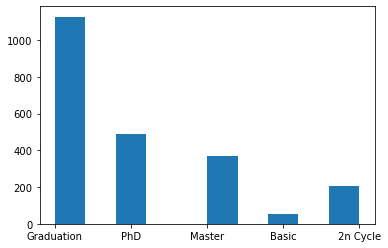

In [13]:
plt.hist(data['Education'])
plt.show()

#### Spalte 4: Marital Status

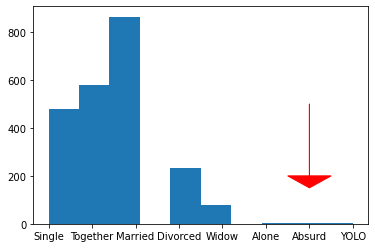

In [14]:
plt.hist(data['Marital_Status'])
plt.arrow(6, 500, 0, -300,head_width=1,head_length=50,color='r') # Pfeil um Outliers zu zeigen
plt.show()


#### Spalte 5: Income

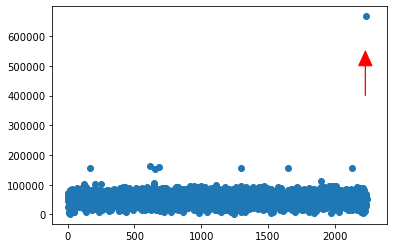

In [15]:
plt.scatter(range(2240),data['Income'])
plt.arrow(2230, 400000, 0, 100000,head_width=100,head_length=50000,color='r') # Pfeil um Outliers zu zeigen
plt.show()

In [16]:
print("Outlier der Inhalt Spalte = ",data['Income'].max()," Es scheint willkürlich eingegeben zu sein.")

Outlier der Inhalt Spalte =  666666.0  Es scheint willkürlich eingegeben zu sein.


#### Spalte 6: Kid home

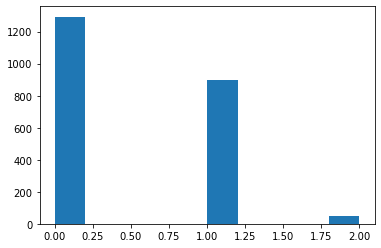

In [17]:
plt.hist(data['Kidhome'])
plt.show()

#### Spalte 7: Teen home

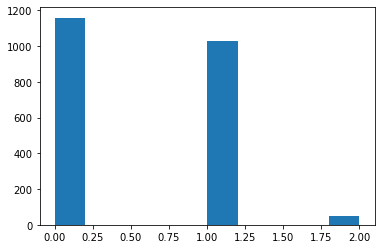

In [18]:
plt.hist(data['Teenhome'])
plt.show()

#### Spalte 8: Dt_Customer

In [19]:
data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [20]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])

##### Date Time Daten --> Deconcatenation zur vereinfachung in 3 neuen Spalten: Dt_Customer_year, Dt_Customer_month & Dt_Customer_day

In [21]:
data['Dt_Customer_year']=data['Dt_Customer'].dt.year
data['Dt_Customer_month']=data['Dt_Customer'].dt.month
data['Dt_Customer_day']=data['Dt_Customer'].dt.day

##### Ausgabe der Deconcatenation

In [22]:
data[['Dt_Customer','Dt_Customer_year','Dt_Customer_month','Dt_Customer_day']]

,Dt_Customer,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day
0,2012-04-09,2012,4,9
1,2014-08-03,2014,8,3
2,2013-08-21,2013,8,21
3,2014-10-02,2014,10,2
4,2014-01-19,2014,1,19
...,...,...,...,...
2235,2013-06-13,2013,6,13
2236,2014-10-06,2014,10,6
2237,2014-01-25,2014,1,25
2238,2014-01-24,2014,1,24


##### Suche nach Outliers oder falschen Angaben in der Ausgabe 

In [23]:
jahre=data['Dt_Customer_year'].unique()
jahre.sort()
jahre

array([2012, 2013, 2014], dtype=int64)

In [24]:
monate=data['Dt_Customer_month'].unique()
monate.sort()
monate

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [25]:
tage=data['Dt_Customer_day'].unique()
tage.sort()
tage

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

#### Spalte 9: Recency

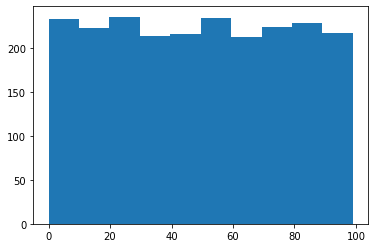

In [26]:
plt.hist(data['Recency'])
plt.show()

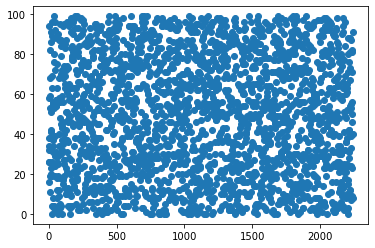

In [27]:
plt.scatter(range(2240),data['Recency'])
plt.show()

#### Spalte 10: MntWines

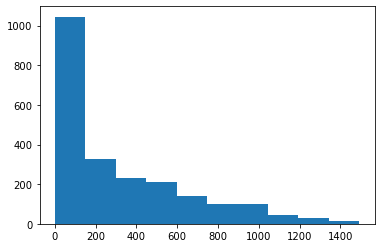

In [28]:
plt.hist(data['MntWines'])
plt.show()

#### Spalte 11: MntFruits

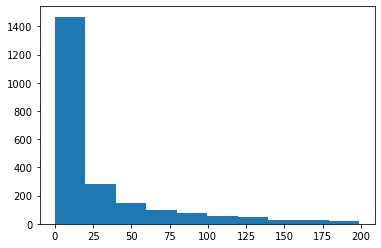

In [29]:
plt.hist(data['MntFruits'])
plt.show()

#### Spalte 12: MntMeatProducts

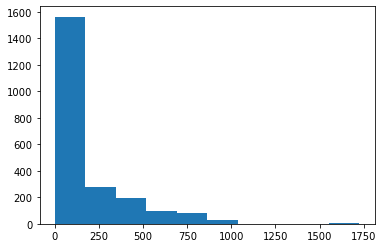

In [30]:
plt.hist(data['MntMeatProducts'])
plt.show()

#### Spalte 13: MntFishProducts

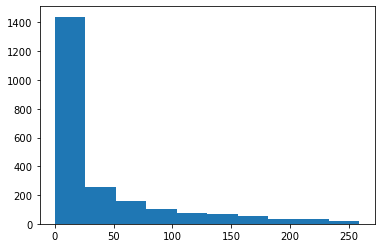

In [31]:
plt.hist(data['MntFishProducts'])
plt.show()

#### Spalte 14: MntSweetProducts

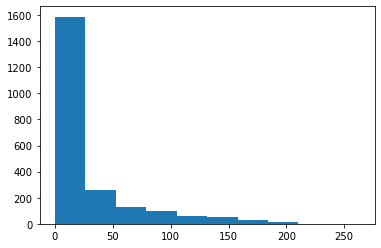

In [32]:
plt.hist(data['MntSweetProducts'])
plt.show()

#### Spalte 15: MntGoldProds

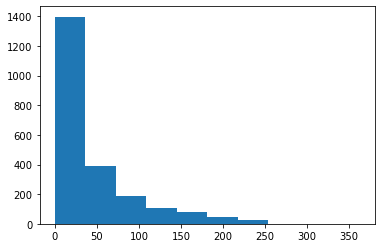

In [33]:
plt.hist(data['MntGoldProds'])
plt.show()

#### Spalte 16: NumDealsPurchases

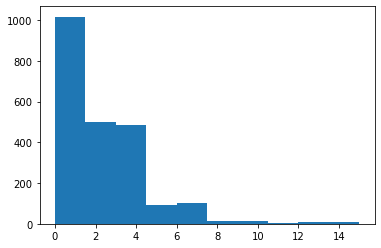

In [34]:
plt.hist(data['NumDealsPurchases'])
plt.show()

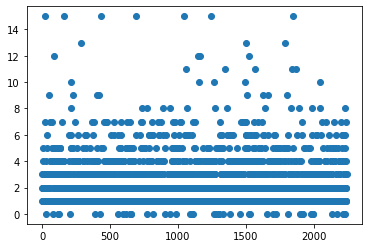

In [35]:
plt.scatter(range(2240),data['NumDealsPurchases'])

#### Spalte 17: NumWebPurchases

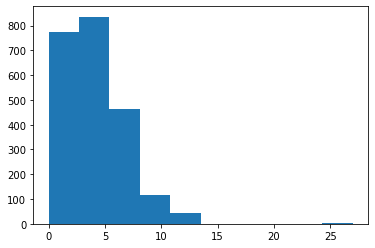

In [36]:
plt.hist(data['NumWebPurchases'])
plt.show()

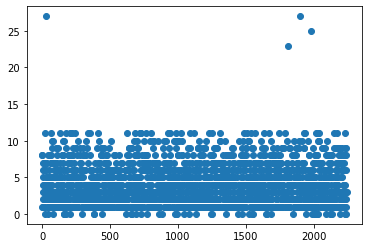

In [37]:
plt.scatter(range(2240),data['NumWebPurchases'])

#### Spalte 18: NumCatalogPurchases

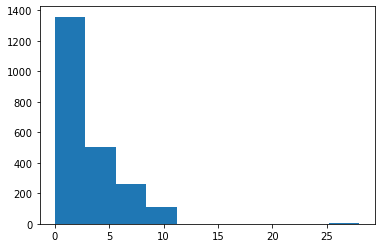

In [38]:
plt.hist(data['NumCatalogPurchases'])
plt.show()

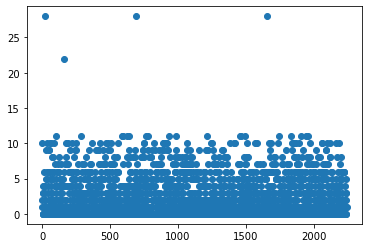

In [39]:
plt.scatter(range(2240),data['NumCatalogPurchases'])
plt.show()

#### Spalte 19: NumStorePurchases

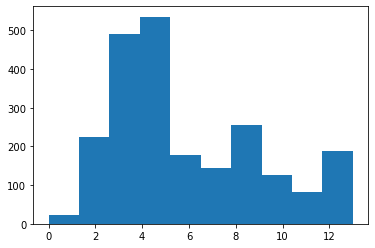

In [40]:
plt.hist(data['NumStorePurchases'])
plt.show()

#### Spalte 20: NumWebVisitsMonth

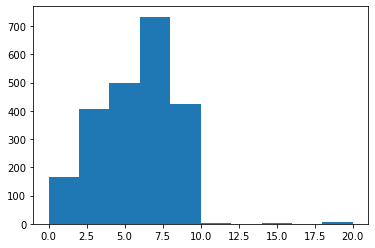

In [41]:
plt.hist(data['NumWebVisitsMonth'])
plt.show()

#### Spalten 21-25: AcceptedCmp 1,2,3,4 & 5

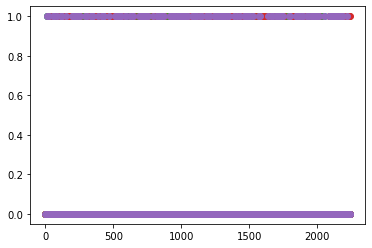

In [42]:
plt.scatter(range(2240),data['AcceptedCmp1'])
plt.scatter(range(2240),data['AcceptedCmp2'])
plt.scatter(range(2240),data['AcceptedCmp3'])
plt.scatter(range(2240),data['AcceptedCmp4'])
plt.scatter(range(2240),data['AcceptedCmp5'])
plt.show()

#### Spalte 26: Complain

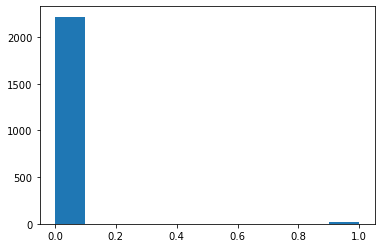

In [43]:
plt.hist(data['Complain'])
plt.show()

#### Spalten 27 und 28: Z_CostContact und Z_Revenue

Die Spalten haben einzige Werte und also keinen Mehrwert

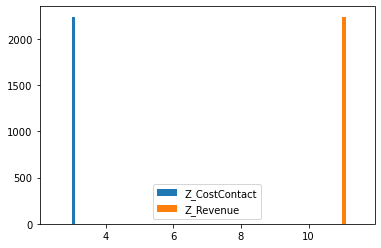

In [44]:
plt.hist(data['Z_CostContact'],label= "Z_CostContact" )
plt.hist(data['Z_Revenue'],label= "Z_Revenue")

plt.legend()
plt.show()

#### Spalte 29: Response

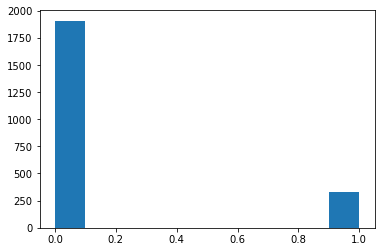

In [45]:
plt.hist(data['Response'])
plt.show()

## Kapitel 3: Data Cleansing & Prepping

#### Spalte 2: Year_Birth

Year_Birth hat Werte (Datum) weniger als 1900. Die müssen entfernt werden:

In [46]:
data['Year_Birth'].sort_values()

239     1893
339     1899
192     1900
1950    1940
424     1941
        ... 
747     1995
1850    1995
696     1995
1170    1996
46      1996
Name: Year_Birth, Length: 2240, dtype: int64

In [47]:
df_main=data[data['Year_Birth']>1938] #df_main als bereinigte Kopie der Dataframe "Data"

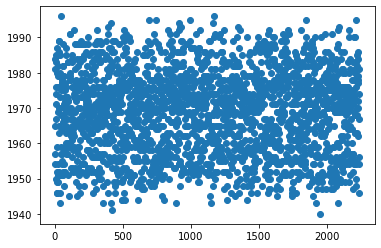

In [48]:
plt.scatter(range(0,df_main['Year_Birth'].shape[0]),df_main['Year_Birth'])
plt.show()

Das Ziel ist die transformation vom Geburtsjahr (numerisch) in einem kategorischen Spalte, um weitere Analyse bzw. Pivoting zu ermöglichen.

zB. 1990 > Nineties
    1980 > Eighties

In [49]:
df_main

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,4,9
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,8,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,10,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,13
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,10,6
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,25
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,24


In [50]:
df_main['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1990, 1947, 1993, 1994, 1941, 1944, 1995,
       1940], dtype=int64)

In [51]:
# Erstens: Extrahieren vom Jahrzehnt x mit der Formel  (x - 100 / 10)
df_main['Decade_Birth']=((pd.to_numeric(df_main['Year_Birth'])-1900)/10).astype(int)

<ipython-input-51-6230034ccb5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Decade_Birth']=((pd.to_numeric(df_main['Year_Birth'])-1900)/10).astype(int)


Ergebnis:

In [52]:
df_main['Decade_Birth']

0       5
1       5
2       6
3       8
4       8
       ..
2235    6
2236    4
2237    8
2238    5
2239    5
Name: Decade_Birth, Length: 2237, dtype: int32

In [53]:
df_main['Decade_Birth'].unique()

array([5, 6, 8, 7, 4, 9])

Jetzt werden die Zahlen als Wörter geschrieben:

4:'Forties' ,
5:'Fifties',
6:'Sixties',
7:'Seventies',
8:'Eighties',
9:'Nineties'

In [54]:
df_main

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Decade_Birth
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,4,9,5
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,8,3,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21,6
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,10,2,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,19,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,13,6
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,10,6,4
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,25,8
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,24,5


In [55]:
df_main = df_main.replace({'Decade_Birth':{4:'Forties' ,5:'Fifties', 6:'Sixties',
                                                   7:'Seventies',8:'Eighties',9:'Nineties',}})


In [56]:
df_main['Decade_Birth'].unique()

array(['Fifties', 'Sixties', 'Eighties', 'Seventies', 'Forties',
       'Nineties'], dtype=object)

In [57]:
df_main

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Decade_Birth
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,4,9,Fifties
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,8,3,Fifties
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21,Sixties
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,10,2,Eighties
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,19,Eighties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,13,Sixties
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,10,6,Forties
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,25,Eighties
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,24,Fifties


#### Spalte 4: Marital_Status

Marital_Status hat sinnlose Werte (YOLO,Absurd,Alone) . Die müssen entfernt werden:

In [58]:
df_main['Marital_Status'].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [59]:
df_main = df_main[~df_main.Marital_Status.isin(["YOLO", "Absurd","Alone"])] # Filtering der Dataframe ohne die 3 Attributwerte

#oder
#df_main=df_main[df_main['Marital_Status']!='YOLO']
#df_main=df_main[df_main['Marital_Status']!='Absurd']
#df_main=df_main[df_main['Marital_Status']!='Alone']

In [60]:
df_main['Marital_Status'].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Name: Marital_Status, dtype: int64

#### Spalte 5: Income

Income hat den Wert 666666. Als Outlier muss er entfernt werden:

In [61]:
df_main['Income'].max()

666666.0

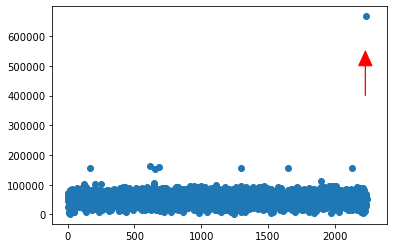

In [62]:
plt.scatter(range(2240),data['Income'])
plt.arrow(2230, 400000, 0, 100000,head_width=100,head_length=50000,color='r') # Pfeil um Outliers zu zeigen
plt.show()

In [63]:
df_main=df_main[df_main['Income']!=666666.0]         # Filtering von df_main sodass 666666 ausgeschlossen ist.

Null bzw. NA Werte werden auch entfernt:

In [64]:
df_main.shape

(2229, 33)

In [65]:
df_main=df_main.dropna(axis=0)

In [66]:
df_main.shape[0]

2205

In [67]:
df_main['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2205, dtype: float64

Outlier entfernt

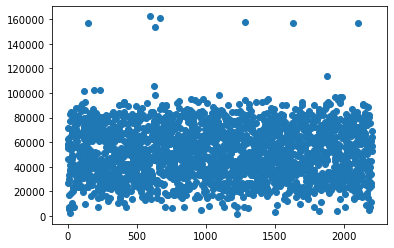

In [68]:
plt.scatter(range(2205),df_main['Income'])

plt.show()

#### Spalten 10 bis 15: MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, 

Alle Produkt -Ausgaben können in einer neuen Spalte summiert:

In [69]:
df_main['MntTotal']=df_main['MntWines']+df_main['MntFruits']+ \
df_main['MntMeatProducts']+df_main['MntFishProducts']+df_main['MntSweetProducts']+df_main['MntGoldProds']

df_main['MntTotal']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: MntTotal, Length: 2205, dtype: int64

#### Spalten 21 bis 25: AcceptedCmp1 - 5

Anzahl der akzeptierte Campaigns haben kein Muster. 

In [70]:
print('AcceptedCmp1',sum(df_main['AcceptedCmp1']),
'\nAcceptedCmp2',sum(df_main['AcceptedCmp2']),
'\nAcceptedCmp3',sum(df_main['AcceptedCmp3']),
'\nAcceptedCmp4',sum(df_main['AcceptedCmp4']),
'\nAcceptedCmp5',sum(df_main['AcceptedCmp5']))


AcceptedCmp1 141 
AcceptedCmp2 30 
AcceptedCmp3 162 
AcceptedCmp4 164 
AcceptedCmp5 160


Eine neue Spalte wird angelegt, die erfasst, ob mindestens ein Capmaign akzeptiert wird, um die Analyse zu vereinfachen:

In [71]:
df_main['AcceptedCmpAll']=df_main['AcceptedCmp1']+df_main['AcceptedCmp2']+ \
df_main['AcceptedCmp3']+df_main['AcceptedCmp4']+df_main['AcceptedCmp5']

df_main['AcceptedCmpAll']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: AcceptedCmpAll, Length: 2205, dtype: int64

In [72]:
df_main

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Decade_Birth,MntTotal,AcceptedCmpAll
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,4,9,Fifties,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,8,3,Fifties,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21,Sixties,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,10,2,Eighties,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,19,Eighties,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,13,Sixties,1341,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,10,6,Forties,444,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,25,Eighties,1241,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,24,Fifties,843,0


#### Spalten 27 und 28: Z_CostContact und Z_Revenue

Die Spalten haben einzige Werte und also keinen Mehrwert. Die ganze Spalten werden entfernt.

In [73]:
df_main=df_main.drop(['Z_CostContact','Z_Revenue'], axis = 1)

In [74]:
df_main

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Decade_Birth,MntTotal,AcceptedCmpAll
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,4,9,Fifties,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,8,3,Fifties,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,8,21,Sixties,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,10,2,Eighties,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,1,19,Eighties,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013,6,13,Sixties,1341,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,2014,10,6,Forties,444,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,2014,1,25,Eighties,1241,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014,1,24,Fifties,843,0


## Kapitel 4: Data Analysis

#### 4.1 Correlation (Pearson's Correlation)

In [75]:
from IPython.display import Image
Image(url= "https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png", width=400, height=400)

df_main.corr(): Computes pairwise correlation of columns, excluding NA/null values.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [76]:
df_corr=df_main.corr()
df_corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,MntTotal,AcceptedCmpAll
ID,1.000000,0.004777,0.000541,0.002381,-0.003782,-0.045373,-0.019096,0.009121,-0.004048,-0.023567,-0.005172,-0.009110,-0.039125,-0.015603,-0.001934,-0.011918,-0.007368,-0.037264,-0.024043,-0.005906,-0.019589,-0.015059,0.031829,-0.025505,-0.004738,0.031904,-0.037958,-0.014866,-0.035482
Year_Birth,0.004777,1.000000,-0.200479,0.238467,-0.362090,-0.014641,-0.164524,-0.014376,-0.032337,-0.042798,-0.022357,-0.062364,-0.066069,-0.161931,-0.127643,-0.139056,0.121737,0.061154,-0.069831,0.015875,-0.015494,-0.007689,-0.004491,0.018088,-0.022920,0.007806,0.005326,-0.115854,-0.004314
Income,0.000541,-0.200479,1.000000,-0.514502,0.035352,0.007008,0.688130,0.506709,0.692684,0.519915,0.523723,0.387227,-0.107973,0.459952,0.696394,0.631350,-0.650649,-0.013855,0.219889,0.394909,0.326602,0.104144,-0.027904,0.161792,0.027948,-0.000604,-0.023058,0.792491,0.365857
Kidhome,0.002381,0.238467,-0.514502,1.000000,-0.039604,0.010483,-0.497476,-0.372848,-0.439038,-0.388376,-0.378256,-0.354335,0.217165,-0.373530,-0.504540,-0.501759,0.447813,0.014376,-0.162372,-0.204056,-0.173586,-0.082032,0.037110,-0.077582,0.051318,0.001722,-0.007835,-0.557846,-0.211657
Teenhome,-0.003782,-0.362090,0.035352,-0.039604,1.000000,0.015592,0.003737,-0.174386,-0.260498,-0.202977,-0.162529,-0.016025,0.386529,0.161032,-0.110911,0.049652,0.128900,-0.044451,0.038332,-0.189212,-0.144065,-0.015609,0.007793,-0.156195,-0.008944,0.005145,-0.000434,-0.137192,-0.129089
Recency,-0.045373,-0.014641,0.007008,0.010483,0.015592,1.000000,0.015409,-0.006837,0.021705,-0.000886,0.023968,0.017340,0.005338,-0.004334,0.022420,-0.000963,-0.016951,-0.032405,0.016928,-0.000923,-0.022402,-0.001690,0.005512,-0.200004,-0.027487,-0.003899,0.017344,0.019294,-0.014619
MntWines,-0.019096,-0.164524,0.688130,-0.497476,0.003737,0.015409,1.000000,0.385999,0.568712,0.398387,0.389594,0.392510,0.009117,0.553780,0.634986,0.640037,-0.322476,0.062982,0.373502,0.473608,0.351999,0.206384,-0.036469,0.247714,-0.153511,0.038363,-0.000702,0.893350,0.511358
MntFruits,0.009121,-0.014376,0.506709,-0.372848,-0.174386,-0.006837,0.385999,1.000000,0.546729,0.591780,0.571523,0.391179,-0.132951,0.304401,0.483955,0.459953,-0.416121,0.015869,0.006617,0.206597,0.189827,-0.009935,-0.002957,0.122859,-0.054309,-0.001506,-0.023394,0.611592,0.154241
MntMeatProducts,-0.004048,-0.032337,0.692684,-0.439038,-0.260498,0.021705,0.568712,0.546729,1.000000,0.573712,0.535234,0.358042,-0.120536,0.308732,0.734775,0.486486,-0.539157,0.019511,0.091562,0.376839,0.314884,0.043503,-0.021106,0.240630,-0.079443,0.029867,-0.019412,0.845788,0.307636
MntFishProducts,-0.023567,-0.042798,0.519915,-0.388376,-0.202977,-0.000886,0.398387,0.591780,0.573712,1.000000,0.585527,0.421336,-0.142227,0.303108,0.530332,0.459246,-0.443744,0.001210,0.016555,0.191122,0.258299,0.002507,-0.019046,0.107206,-0.067506,-0.014619,-0.015405,0.642162,0.173325


Visualisieren der Correlation mit Seaborn Heatmap, um die Stärke der Correlation zu erkennen:

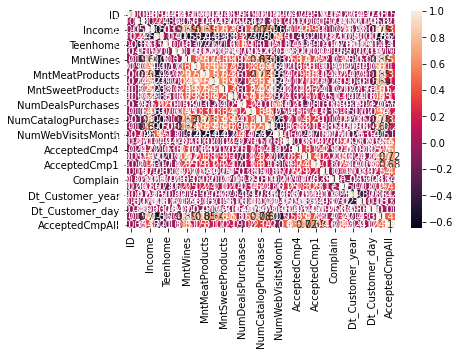

In [77]:
sns.heatmap(df_corr, annot=True)
plt.show()

Schwache Correlation (zwischen null und +/- 0,5) kann entfernt werden. Correlation von 1 ist unnötig in der Heatmap zu visualisieren:

In [78]:
df_corr_1=df_corr[((0.5 < df_corr)  | (df_corr < -0.5)) & (df_corr != 1)]
df_corr_1

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,MntTotal,AcceptedCmpAll
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Birth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,NaN,-0.514502,NaN,NaN,0.688130,0.506709,0.692684,0.519915,0.523723,NaN,NaN,NaN,0.696394,0.631350,-0.650649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792491,NaN
Kidhome,NaN,NaN,-0.514502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.504540,-0.501759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.557846,NaN
Teenhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,0.688130,NaN,NaN,NaN,NaN,NaN,0.568712,NaN,NaN,NaN,NaN,0.553780,0.634986,0.640037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893350,0.511358
MntFruits,NaN,NaN,0.506709,NaN,NaN,NaN,NaN,NaN,0.546729,0.591780,0.571523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.611592,NaN
MntMeatProducts,NaN,NaN,0.692684,NaN,NaN,NaN,0.568712,0.546729,NaN,0.573712,0.535234,NaN,NaN,NaN,0.734775,NaN,-0.539157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.845788,NaN
MntFishProducts,NaN,NaN,0.519915,NaN,NaN,NaN,NaN,0.591780,0.573712,NaN,0.585527,NaN,NaN,NaN,0.530332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642162,NaN


Entfernung aller Zeilen, die völlig NaN enthalten, um die Correlation-Tabelle zu vereinfachen:

In [79]:
df_corr_2=df_corr_1.dropna(how='all') 
df_corr_2

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,MntTotal,AcceptedCmpAll
Income,NaN,NaN,NaN,-0.514502,NaN,NaN,0.688130,0.506709,0.692684,0.519915,0.523723,NaN,NaN,NaN,0.696394,0.631350,-0.650649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792491,NaN
Kidhome,NaN,NaN,-0.514502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.504540,-0.501759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.557846,NaN
MntWines,NaN,NaN,0.688130,NaN,NaN,NaN,NaN,NaN,0.568712,NaN,NaN,NaN,NaN,0.553780,0.634986,0.640037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893350,0.511358
MntFruits,NaN,NaN,0.506709,NaN,NaN,NaN,NaN,NaN,0.546729,0.591780,0.571523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.611592,NaN
MntMeatProducts,NaN,NaN,0.692684,NaN,NaN,NaN,0.568712,0.546729,NaN,0.573712,0.535234,NaN,NaN,NaN,0.734775,NaN,-0.539157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.845788,NaN
MntFishProducts,NaN,NaN,0.519915,NaN,NaN,NaN,NaN,0.591780,0.573712,NaN,0.585527,NaN,NaN,NaN,0.530332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642162,NaN
MntSweetProducts,NaN,NaN,0.523723,NaN,NaN,NaN,NaN,0.571523,0.535234,0.585527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.606878,NaN
MntGoldProds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.526899,NaN
NumWebPurchases,NaN,NaN,NaN,NaN,NaN,NaN,0.553780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.530561,NaN
NumCatalogPurchases,NaN,NaN,0.696394,-0.504540,NaN,NaN,0.634986,NaN,0.734775,0.530332,NaN,NaN,NaN,NaN,NaN,0.518238,-0.520677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780273,NaN


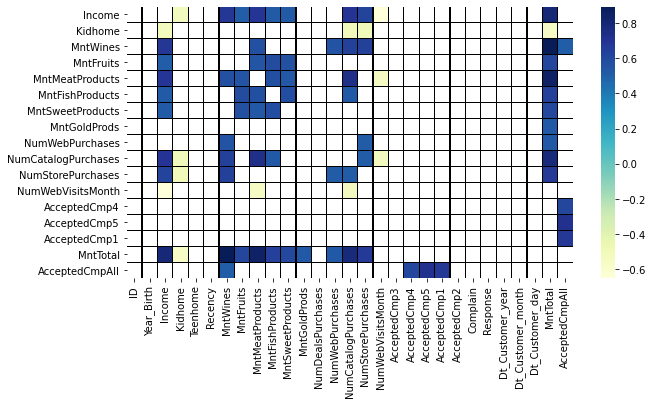

In [80]:
#Basic Heatmap
#sns.heatmap(df_corr_2, annot=True)
#plt.show()

fig, ax = plt.subplots(figsize=(10,5))   
sns.heatmap(df_corr_2, cmap="YlGnBu", mask=df_corr_2.isnull(),linewidths=.2, ax=ax,linecolor='black')
plt.show()


Entfernung von Spalten, die keine Werte (nach dem Filtering) haben

In [81]:
df_corr_3=df_corr_2.drop(labels=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain',
                                 'Response','Dt_Customer_year','Dt_Customer_month','Dt_Customer_day','Teenhome','Recency','MntGoldProds'
                                 ,'NumDealsPurchases','ID','Year_Birth'], axis = 1)

Endgültige Correlation-Dataframe:

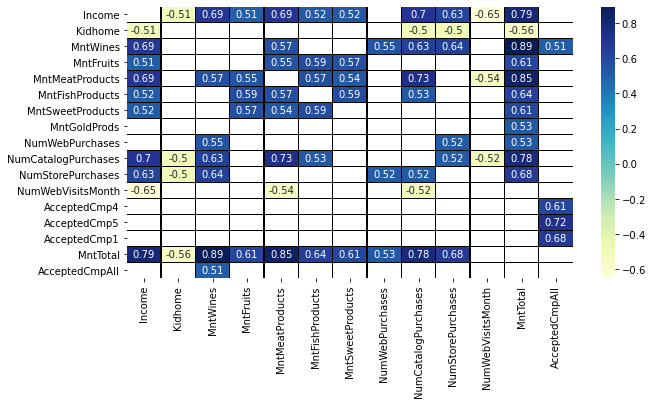

In [82]:
fig, ax = plt.subplots(figsize=(10,5))   
sns.heatmap(df_corr_3, cmap="YlGnBu",linewidths=.2, ax=ax,linecolor='black',annot=True)

plt.show()

Sind die Werte des originalen Corr. Dataframe aufbewahrt?

In [83]:
df_corr_3.sort_index(inplace=True)==df_corr.sort_index(inplace=True)

True

In [84]:
df_corr_3.sort_index(inplace=True)

Positive Correlation

Negative Correlation

#### 4.2 Marital_Status

##### Pivoting / Grouping

In [85]:
grouped_Marital=df_main.groupby("Marital_Status").mean()

grouped_Marital

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,MntTotal,AcceptedCmpAll
Marital_Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Divorced,5416.662338,1966.562771,52904.333333,0.411255,0.593074,49.272727,326.186147,27.519481,150.822511,35.164502,26.917749,46.380952,2.441558,4.320346,2.679654,5.835498,5.489177,0.086580,0.077922,0.056277,0.051948,0.021645,0.004329,0.207792,2013.017316,6.354978,15.839827,612.991342,0.294372
Married,5634.009335,1969.568261,51724.978996,0.453909,0.511085,48.310385,299.855309,25.648775,160.896149,35.466744,26.751459,42.845974,2.382730,4.085181,2.630105,5.849475,5.355893,0.073512,0.072345,0.077013,0.072345,0.008168,0.009335,0.114352,2013.042007,6.467911,15.744457,591.464411,0.303384
Single,5477.282979,1971.738298,50975.804255,0.457447,0.400000,49.255319,291.934043,27.319149,185.231915,38.840426,27.129787,43.393617,2.134043,3.857447,2.638298,5.685106,5.282979,0.080851,0.068085,0.065957,0.063830,0.010638,0.012766,0.225532,2013.025532,6.695745,15.414894,613.848936,0.289362
Together,5628.964974,1967.851138,52118.201401,0.450088,0.530648,50.061296,308.145359,25.313485,166.014011,39.003503,26.210158,42.938704,2.327496,4.105079,2.676007,5.763573,5.283713,0.064799,0.073555,0.075306,0.056042,0.021016,0.008757,0.105079,2013.021016,6.388792,15.642732,607.625219,0.290718
Widow,5979.026316,1958.763158,56481.552632,0.236842,0.644737,48.802632,367.131579,31.868421,185.328947,49.907895,37.868421,55.855263,2.355263,4.618421,3.302632,6.355263,4.934211,0.052632,0.131579,0.092105,0.065789,0.013158,0.000000,0.236842,2012.973684,7.131579,14.289474,727.960526,0.355263


In [86]:
## Alternative Heatmap - Full Pivot

##fig, ax = plt.subplots(figsize=(10,5))   
##sns.heatmap(grouped_Marital, cmap="YlGnBu",linewidths=.2, ax=ax,linecolor='black',annot=True)

##plt.show()

In [87]:
## Alternative Heatmap - Trimmed Pivot

##fig, ax = plt.subplots(figsize=(10,5))   
##sns.heatmap(grouped_trimmed_Marital, cmap="YlGnBu",linewidths=.2, ax=ax,linecolor='black',annot=True)

##plt.show()

Entfernung von Spalten, die nicht notwedig sind oder nicht addiert (Mittelwert) werden können:

In [88]:
grouped_trimmed_Marital=grouped_Marital.drop(labels=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                                                     'Response','Dt_Customer_year','Dt_Customer_month','Dt_Customer_day'
                                                     ,'Recency','NumDealsPurchases','ID','Year_Birth'], axis = 1)

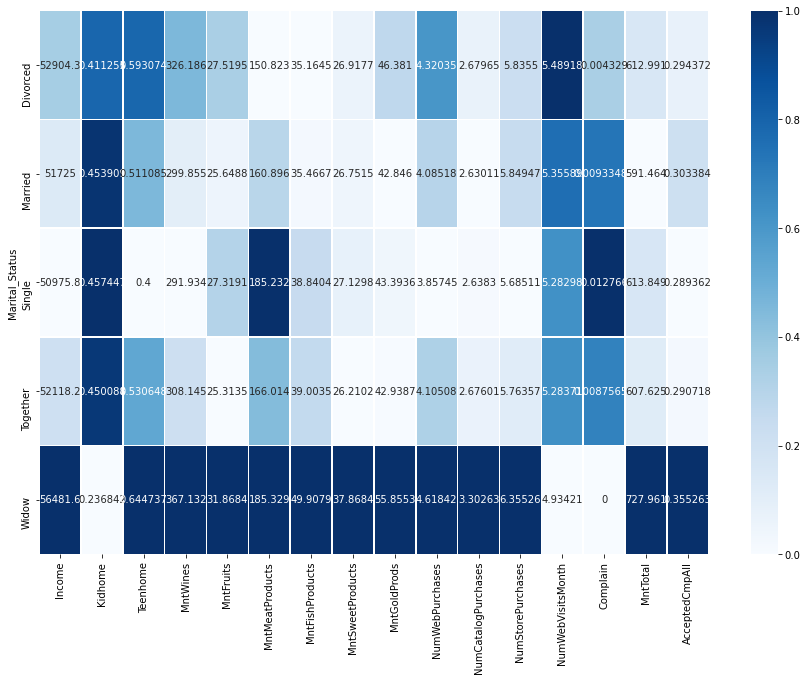

In [89]:
fig, ax = plt.subplots(figsize=(15,10)) 

scaled_df = (grouped_trimmed_Marital - grouped_trimmed_Marital.min(axis=0))/(grouped_trimmed_Marital.max(axis=0) - grouped_trimmed_Marital.min(axis=0))
sns.heatmap(scaled_df, annot=grouped_trimmed_Marital, linewidths=.5, cmap="Blues",ax=ax, fmt='g')

plt.show()

##### Marital Status vs Expenses per Product

Sortieren von einer Spalten:

In [90]:
grouped_Marital.sort_values('MntMeatProducts', ascending=False, inplace=True)

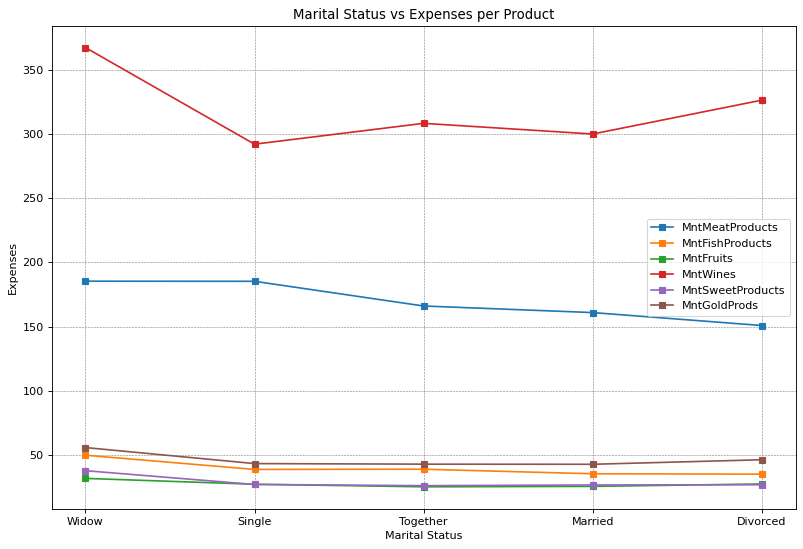

In [91]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Marital.index,grouped_Marital['MntMeatProducts'],label='MntMeatProducts',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['MntFishProducts'],label='MntFishProducts',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['MntFruits'],label='MntFruits',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['MntWines'],label='MntWines',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['MntSweetProducts'],label='MntSweetProducts',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['MntGoldProds'],label='MntGoldProds',marker="s")

plt.xlabel("Marital Status")
plt.ylabel("Expenses")
plt.title("Marital Status vs Expenses per Product")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

##### Marital Status vs Purchase Trends

Sortieren von einer Spalten:

In [92]:
grouped_Marital.sort_values('MntMeatProducts', ascending=False, inplace=True)

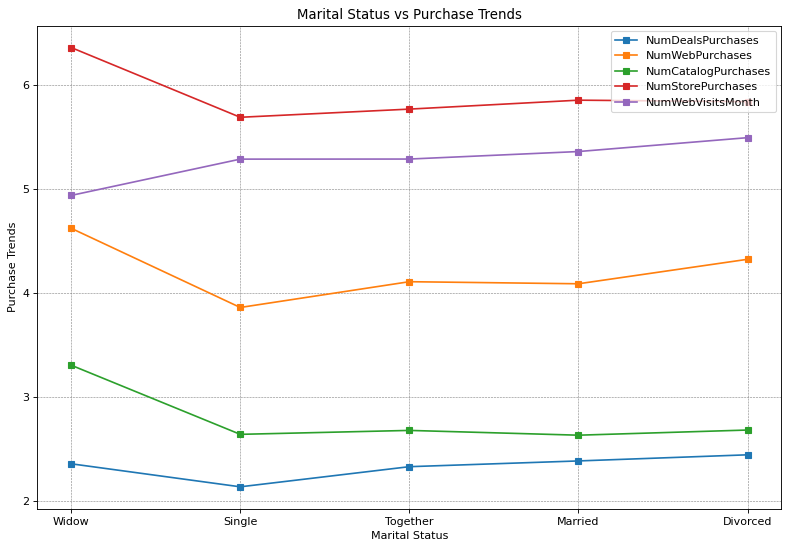

In [93]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Marital.index,grouped_Marital['NumDealsPurchases'],label='NumDealsPurchases',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['NumWebPurchases'],label='NumWebPurchases',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['NumCatalogPurchases'],label='NumCatalogPurchases',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['NumStorePurchases'],label='NumStorePurchases',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['NumWebVisitsMonth'],label='NumWebVisitsMonth',marker="s")

plt.xlabel("Marital Status")
plt.ylabel("Purchase Trends")
plt.title("Marital Status vs Purchase Trends")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

##### Marital Status vs Campaign Engagement

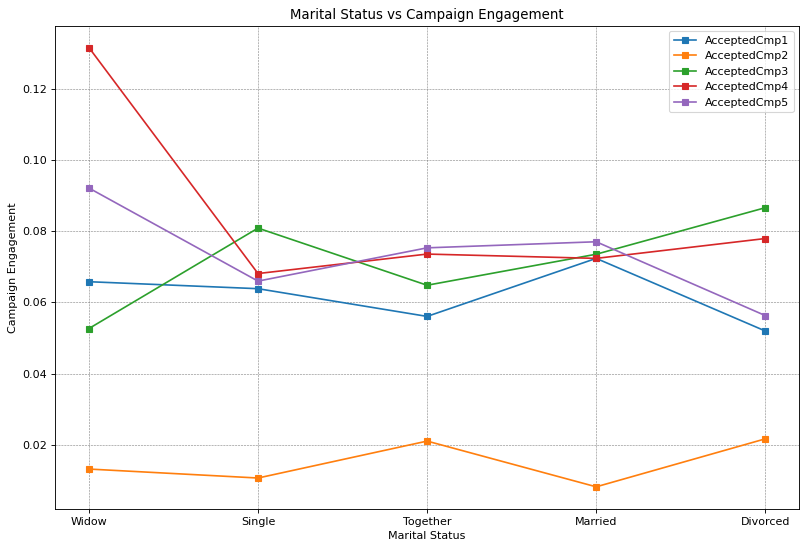

In [94]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Marital.index,grouped_Marital['AcceptedCmp1'],label='AcceptedCmp1',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['AcceptedCmp2'],label='AcceptedCmp2',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['AcceptedCmp3'],label='AcceptedCmp3',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['AcceptedCmp4'],label='AcceptedCmp4',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['AcceptedCmp5'],label='AcceptedCmp5',marker="s")

plt.xlabel("Marital Status")
plt.ylabel("Campaign Engagement")
plt.title("Marital Status vs Campaign Engagement")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

Alle Campagins als einziges Element (summiert) betrachtet:

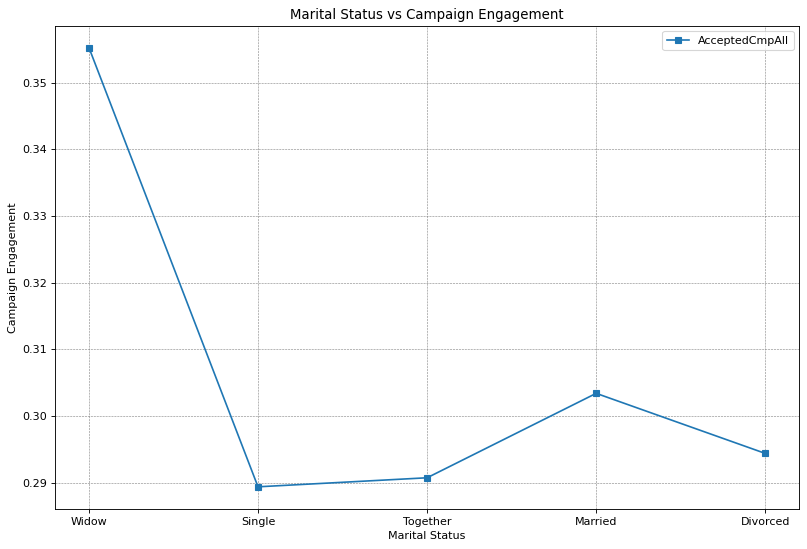

In [95]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Marital.index,grouped_Marital['AcceptedCmpAll'],label='AcceptedCmpAll',marker="s")

plt.xlabel("Marital Status")
plt.ylabel("Campaign Engagement")
plt.title("Marital Status vs Campaign Engagement")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

#### 4.3 Education

##### Pivoting / Grouping

In [96]:
grouped_Education=df_main.groupby("Education").mean()

grouped_Education

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,MntTotal,AcceptedCmpAll
Education,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2n Cycle,5514.545455,1972.792929,47625.333333,0.474747,0.409091,48.383838,202.757576,29.626263,136.378788,48.454545,35.055556,47.217172,2.272727,3.787879,2.373737,5.595960,5.469697,0.075758,0.045455,0.050505,0.070707,0.010101,0.015152,0.111111,2012.979798,6.101010,14.732323,499.489899,0.252525
Basic,5396.407407,1977.462963,20306.259259,0.629630,0.092593,48.444444,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333,1.796296,1.888889,0.481481,2.851852,6.870370,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,2012.777778,6.666667,17.500000,81.796296,0.111111
Graduation,5663.214735,1969.592093,52161.591195,0.440252,0.493261,49.930818,285.378257,30.833783,180.729560,43.318958,31.301887,50.571429,2.309973,4.117700,2.735849,5.844564,5.287511,0.070081,0.070979,0.076370,0.070979,0.014376,0.012579,0.135669,2013.021563,6.495957,15.804133,622.133872,0.302785
Master,5387.049587,1967.000000,52859.730028,0.457300,0.534435,47.330579,332.683196,21.294766,162.311295,31.118457,20.909091,39.848485,2.415978,4.019284,2.542700,5.887052,5.206612,0.066116,0.085399,0.074380,0.049587,0.005510,0.005510,0.154270,2013.066116,6.432507,15.707989,608.165289,0.280992
PhD,5619.538784,1966.140461,56162.767296,0.398323,0.599581,48.800839,407.672956,20.000000,169.756813,26.859539,20.366876,31.987421,2.352201,4.429769,2.993711,6.085954,5.249476,0.081761,0.094340,0.079665,0.062893,0.020964,0.002096,0.207547,2013.062893,6.740042,15.222222,676.643606,0.339623


In [97]:
grouped_trimmed_Education=grouped_Education.drop(labels=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                                                     'Response','Dt_Customer_year','Dt_Customer_month','Dt_Customer_day'
                                                     ,'Recency','NumDealsPurchases','ID','Year_Birth'], axis = 1)

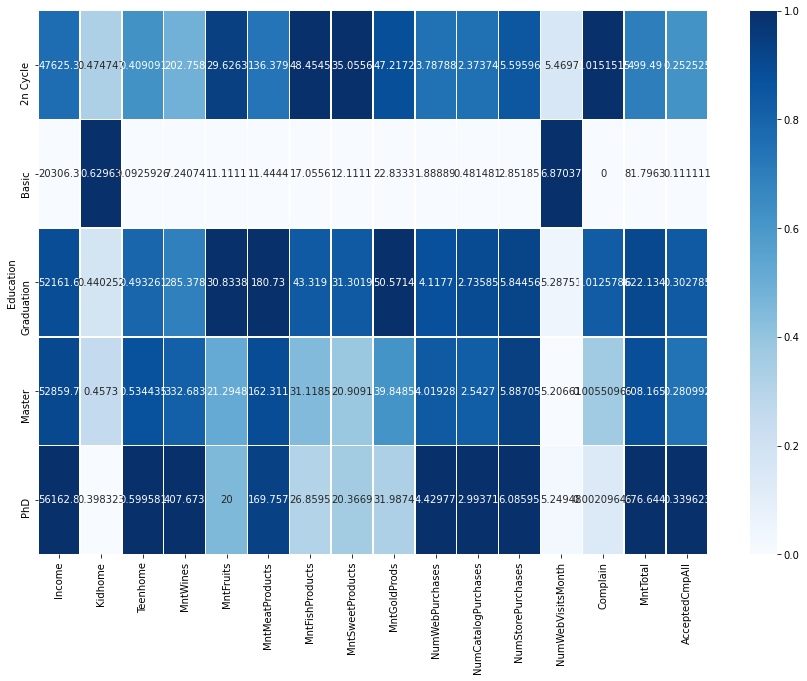

In [98]:
fig, ax = plt.subplots(figsize=(15,10)) 

scaled_df = (grouped_trimmed_Education - grouped_trimmed_Education.min(axis=0))/(grouped_trimmed_Education.max(axis=0) - grouped_trimmed_Education.min(axis=0))
sns.heatmap(scaled_df, annot=grouped_trimmed_Education, linewidths=.5, cmap="Blues",ax=ax, fmt='g')

plt.show()

##### Education vs Expenses per Product

Sortieren von einer Spalten:

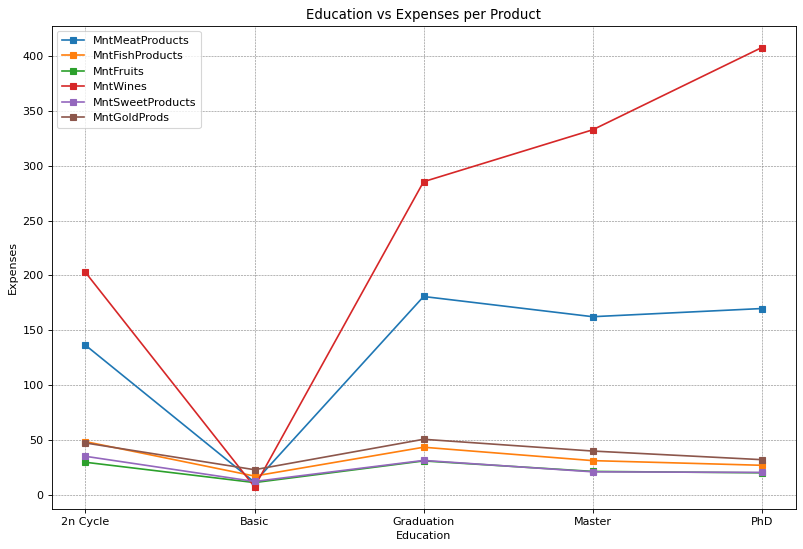

In [99]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Education.index,grouped_Education['MntMeatProducts'],label='MntMeatProducts',marker="s")
plt.plot(grouped_Education.index,grouped_Education['MntFishProducts'],label='MntFishProducts',marker="s")
plt.plot(grouped_Education.index,grouped_Education['MntFruits'],label='MntFruits',marker="s")
plt.plot(grouped_Education.index,grouped_Education['MntWines'],label='MntWines',marker="s")
plt.plot(grouped_Education.index,grouped_Education['MntSweetProducts'],label='MntSweetProducts',marker="s")
plt.plot(grouped_Education.index,grouped_Education['MntGoldProds'],label='MntGoldProds',marker="s")

plt.xlabel("Education")
plt.ylabel("Expenses")
plt.title("Education vs Expenses per Product")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

##### Education vs Purchase Trends

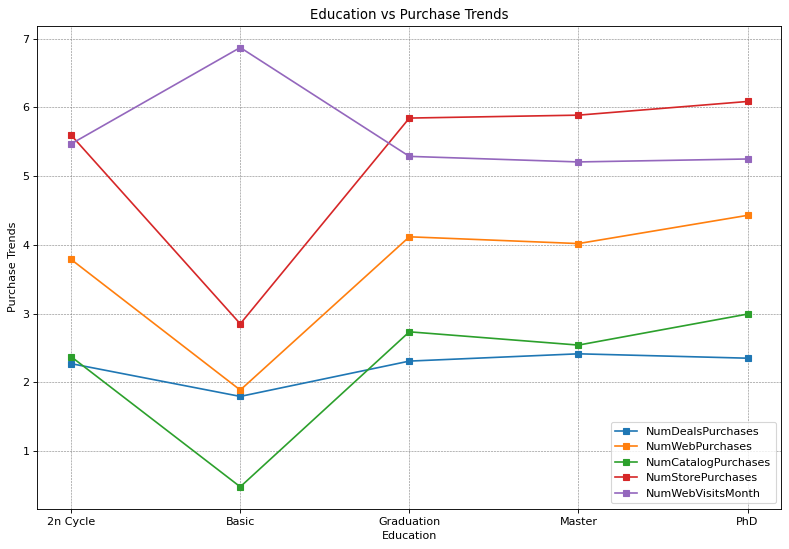

In [100]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Education.index,grouped_Education['NumDealsPurchases'],label='NumDealsPurchases',marker="s")
plt.plot(grouped_Education.index,grouped_Education['NumWebPurchases'],label='NumWebPurchases',marker="s")
plt.plot(grouped_Education.index,grouped_Education['NumCatalogPurchases'],label='NumCatalogPurchases',marker="s")
plt.plot(grouped_Education.index,grouped_Education['NumStorePurchases'],label='NumStorePurchases',marker="s")
plt.plot(grouped_Education.index,grouped_Education['NumWebVisitsMonth'],label='NumWebVisitsMonth',marker="s")

plt.xlabel("Education")
plt.ylabel("Purchase Trends")
plt.title("Education vs Purchase Trends")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

##### Education vs Campaign Engagement

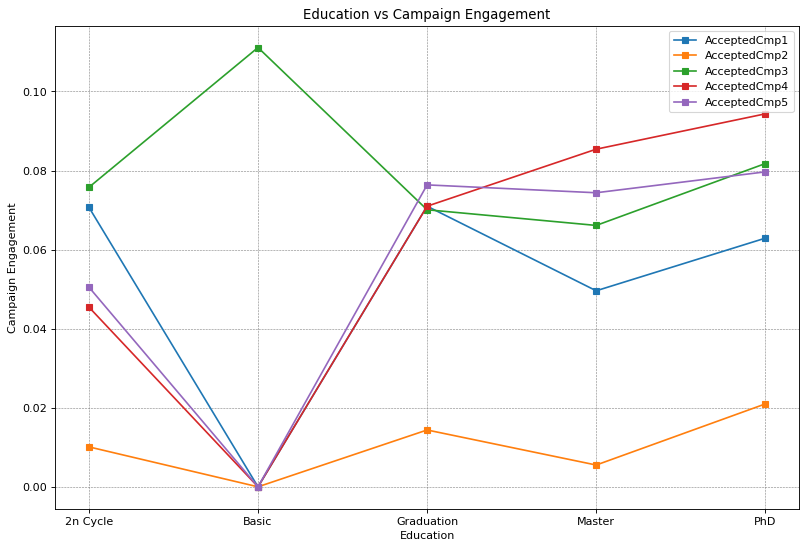

In [101]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Education.index,grouped_Education['AcceptedCmp1'],label='AcceptedCmp1',marker="s")
plt.plot(grouped_Education.index,grouped_Education['AcceptedCmp2'],label='AcceptedCmp2',marker="s")
plt.plot(grouped_Education.index,grouped_Education['AcceptedCmp3'],label='AcceptedCmp3',marker="s")
plt.plot(grouped_Education.index,grouped_Education['AcceptedCmp4'],label='AcceptedCmp4',marker="s")
plt.plot(grouped_Education.index,grouped_Education['AcceptedCmp5'],label='AcceptedCmp5',marker="s")

plt.xlabel("Education")
plt.ylabel("Campaign Engagement")
plt.title("Education vs Campaign Engagement")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

Alle Campagins als einziges Element (summiert) betrachtet:

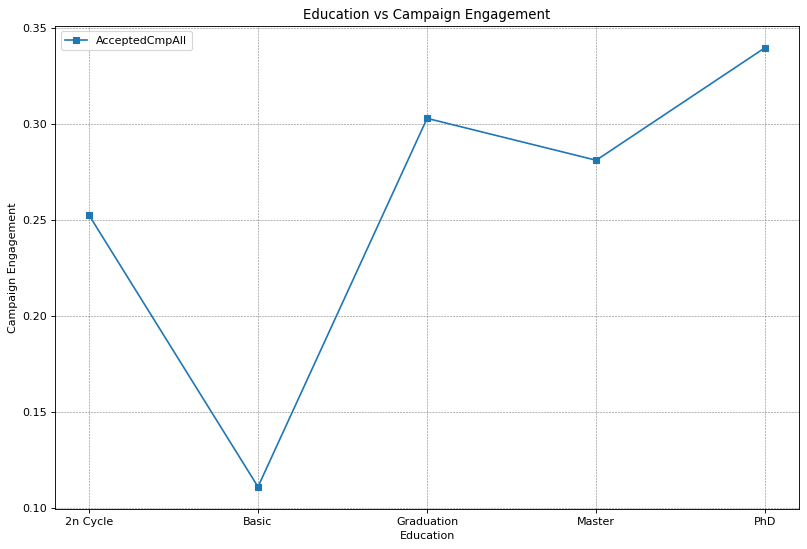

In [102]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Education.index,grouped_Education['AcceptedCmpAll'],label='AcceptedCmpAll',marker="s")

plt.xlabel("Education")
plt.ylabel("Campaign Engagement")
plt.title("Education vs Campaign Engagement")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

#### 4.4 Birth Year

##### Pivoting / Grouping

In [103]:
grouped_Birth=df_main.sort_values("Year_Birth")

In [104]:
grouped_Birth=df_main.groupby("Decade_Birth").mean()

grouped_Birth

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,MntTotal,AcceptedCmpAll
Decade_Birth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Eighties,5740.406162,1984.148459,45885.380952,0.613445,0.056022,48.221289,236.619048,26.946779,167.084034,37.352941,27.291317,39.042017,1.843137,3.417367,2.201681,5.218487,5.554622,0.106443,0.050420,0.106443,0.075630,0.008403,0.011204,0.187675,2013.016807,6.327731,15.736695,534.336134,0.347339
Fifties,5713.372506,1954.778271,56538.055432,0.266075,0.747228,50.523282,354.492239,26.747228,178.079823,41.283814,28.425721,50.419069,2.425721,4.478936,3.150776,6.261641,4.900222,0.057650,0.086475,0.068736,0.070953,0.019956,0.017738,0.130820,2013.046563,6.385809,15.487805,679.447894,0.303769
Forties,5575.858491,1946.915094,64025.726415,0.113208,0.377358,45.358491,497.254717,35.000000,257.367925,54.490566,37.877358,45.707547,1.839623,5.235849,4.056604,7.141509,4.207547,0.075472,0.141509,0.150943,0.132075,0.000000,0.009434,0.235849,2013.056604,6.405660,16.283019,927.698113,0.500000
Nineties,5682.033333,1991.700000,52437.550000,0.183333,0.000000,45.050000,330.800000,37.633333,293.783333,50.550000,35.000000,56.050000,1.516667,3.583333,3.500000,5.733333,4.966667,0.116667,0.066667,0.166667,0.100000,0.033333,0.016667,0.216667,2012.950000,6.300000,17.383333,803.816667,0.483333
Seventies,5433.908093,1974.274348,49131.502058,0.585734,0.481481,48.377229,258.037037,23.596708,144.083676,33.598080,25.312757,39.301783,2.489712,3.836763,2.307270,5.443073,5.654321,0.078189,0.057613,0.052126,0.049383,0.010974,0.006859,0.141289,2013.019204,6.751715,15.219479,523.930041,0.248285
Sixties,5583.914343,1964.850598,53646.091633,0.368526,0.731076,50.695219,335.402390,26.296813,156.888446,35.021912,25.115538,45.926295,2.517928,4.382470,2.715139,6.077689,5.326693,0.051793,0.091633,0.053785,0.051793,0.015936,0.001992,0.125498,2013.035857,6.434263,15.832669,624.651394,0.264940


In [105]:
grouped_trimmed_Birth=grouped_Birth.drop(labels=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                                                     'Response','Dt_Customer_year','Dt_Customer_month','Dt_Customer_day'
                                                     ,'Recency','NumDealsPurchases','ID'], axis = 1)

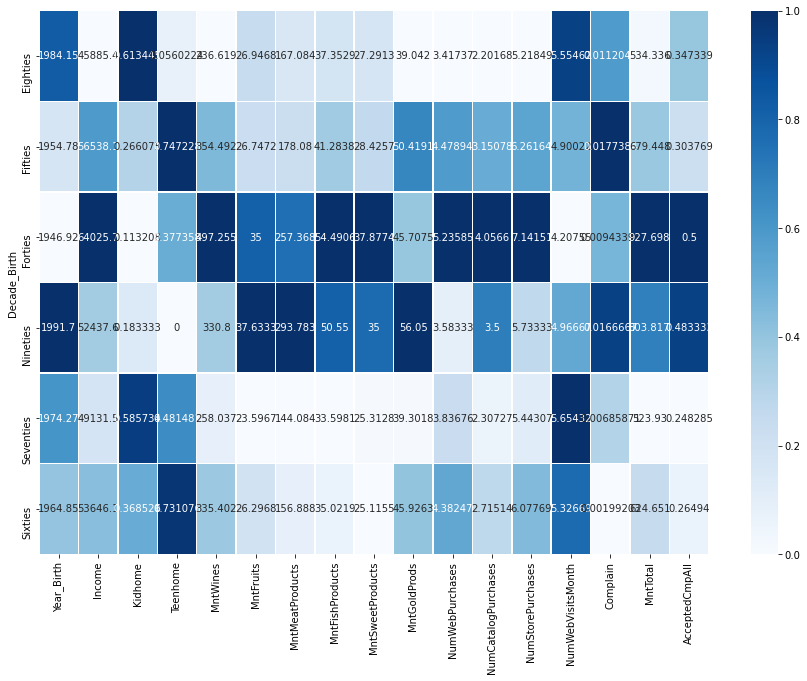

In [106]:
fig, ax = plt.subplots(figsize=(15,10)) 

scaled_df = (grouped_trimmed_Birth - grouped_trimmed_Birth.min(axis=0))/(grouped_trimmed_Birth.max(axis=0) - grouped_trimmed_Birth.min(axis=0))
sns.heatmap(scaled_df, annot=grouped_trimmed_Birth, linewidths=.5, cmap="Blues",ax=ax, fmt='g')

plt.show()

##### Birth Decade vs Expenses

In [107]:
grouped_Birth=grouped_Birth.sort_values("Year_Birth", ascending=True)

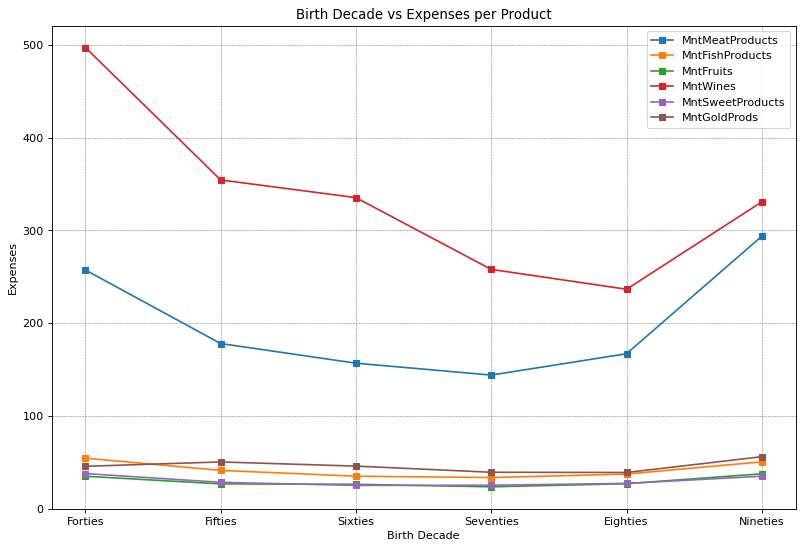

In [108]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Birth.index,grouped_Birth['MntMeatProducts'],label='MntMeatProducts',marker="s")
plt.plot(grouped_Birth.index,grouped_Birth['MntFishProducts'],label='MntFishProducts',marker="s")
plt.plot(grouped_Birth.index,grouped_Birth['MntFruits'],label='MntFruits',marker="s")
plt.plot(grouped_Birth.index,grouped_Birth['MntWines'],label='MntWines',marker="s")
plt.plot(grouped_Birth.index,grouped_Birth['MntSweetProducts'],label='MntSweetProducts',marker="s")
plt.plot(grouped_Birth.index,grouped_Birth['MntGoldProds'],label='MntGoldProds',marker="s")

plt.xlabel("Birth Decade")
plt.ylabel("Expenses")
plt.title("Birth Decade vs Expenses per Product")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

Alle Campagins als einziges Element (summiert) betrachtet:

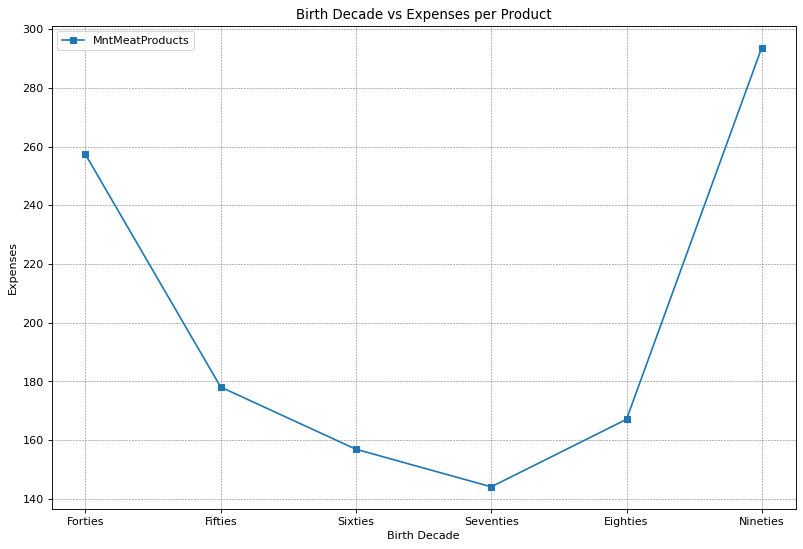

In [109]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Birth.index,grouped_Birth['MntMeatProducts'],label='MntMeatProducts',marker="s")

plt.xlabel("Birth Decade")
plt.ylabel("Expenses")
plt.title("Birth Decade vs Expenses per Product")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

##### Birth Decade vs Purchase Trends

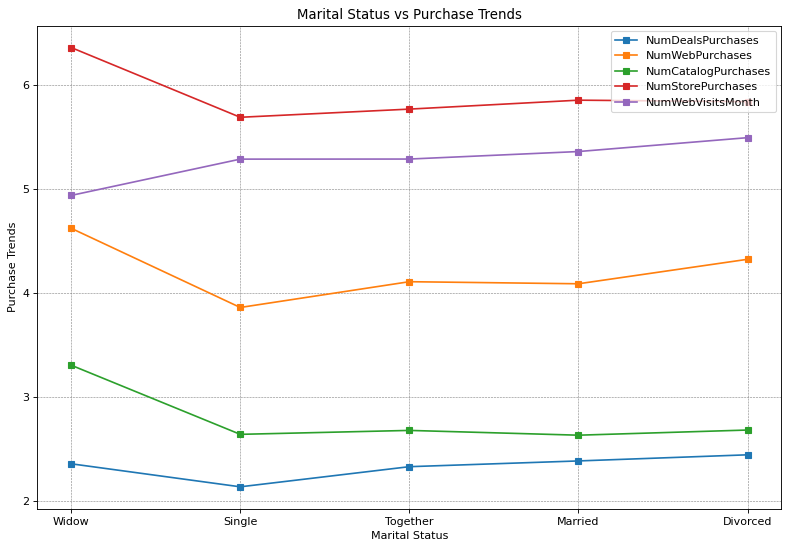

In [110]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Marital.index,grouped_Marital['NumDealsPurchases'],label='NumDealsPurchases',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['NumWebPurchases'],label='NumWebPurchases',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['NumCatalogPurchases'],label='NumCatalogPurchases',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['NumStorePurchases'],label='NumStorePurchases',marker="s")
plt.plot(grouped_Marital.index,grouped_Marital['NumWebVisitsMonth'],label='NumWebVisitsMonth',marker="s")

plt.xlabel("Marital Status")
plt.ylabel("Purchase Trends")
plt.title("Marital Status vs Purchase Trends")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

##### Birth Decade vs Campaign Engagement

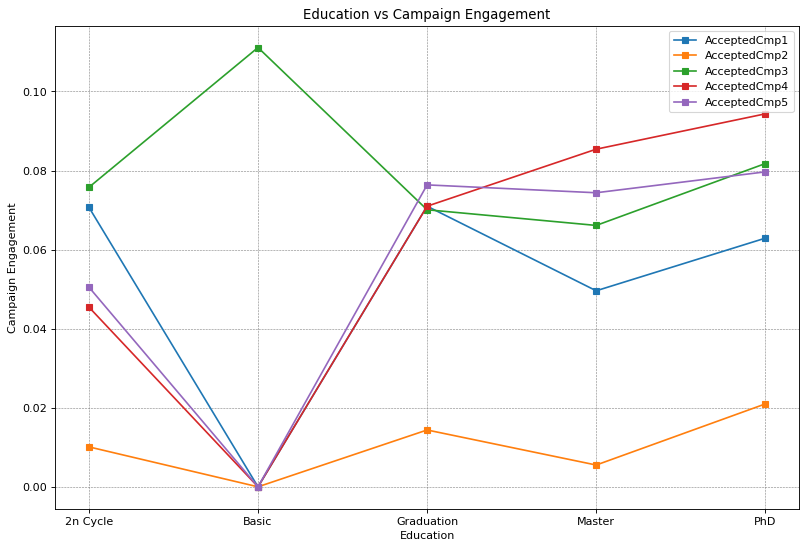

In [111]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Education.index,grouped_Education['AcceptedCmp1'],label='AcceptedCmp1',marker="s")
plt.plot(grouped_Education.index,grouped_Education['AcceptedCmp2'],label='AcceptedCmp2',marker="s")
plt.plot(grouped_Education.index,grouped_Education['AcceptedCmp3'],label='AcceptedCmp3',marker="s")
plt.plot(grouped_Education.index,grouped_Education['AcceptedCmp4'],label='AcceptedCmp4',marker="s")
plt.plot(grouped_Education.index,grouped_Education['AcceptedCmp5'],label='AcceptedCmp5',marker="s")

plt.xlabel("Education")
plt.ylabel("Campaign Engagement")
plt.title("Education vs Campaign Engagement")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

Alle Campagins als einziges Element (summiert) betrachtet:

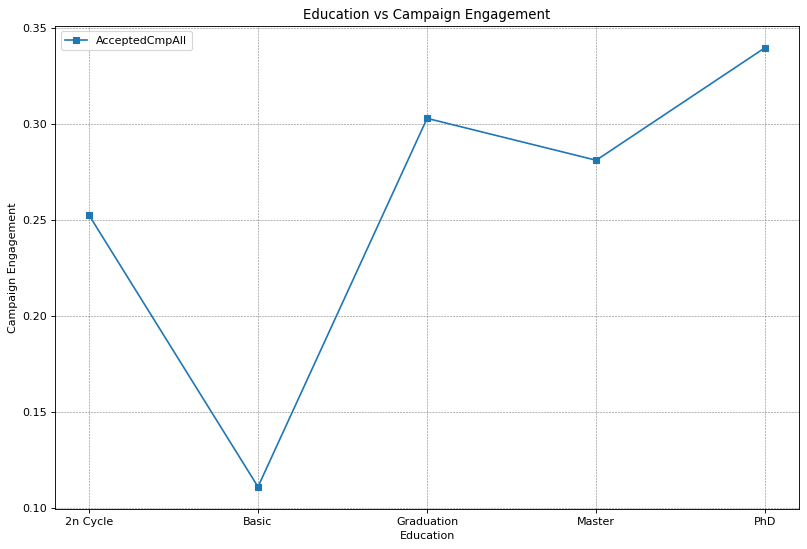

In [112]:

figure(figsize=(12, 8), dpi=80)

plt.plot(grouped_Education.index,grouped_Education['AcceptedCmpAll'],label='AcceptedCmpAll',marker="s")

plt.xlabel("Education")
plt.ylabel("Campaign Engagement")
plt.title("Education vs Campaign Engagement")



plt.legend()

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

## Kapitel 5: Multiple Regression

#### 5.0 df_main

In [113]:
df_main # Dataframe soweit

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Decade_Birth,MntTotal,AcceptedCmpAll
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,4,9,Fifties,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,8,3,Fifties,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,8,21,Sixties,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,10,2,Eighties,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,1,19,Eighties,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013,6,13,Sixties,1341,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,2014,10,6,Forties,444,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,2014,1,25,Eighties,1241,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014,1,24,Fifties,843,0


#### 5.1 Spalten auswählen und vorbereiten

Durch Trial and Error, werden folgende Spalten ausgewählt:

In [114]:
df_main_reg=df_main[['Year_Birth','Education','Marital_Status','Kidhome','Teenhome','Income','MntTotal']]

In [115]:
df_main_reg

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Income,MntTotal
0,1957,Graduation,Single,0,0,58138.0,1617
1,1954,Graduation,Single,1,1,46344.0,27
2,1965,Graduation,Together,0,0,71613.0,776
3,1984,Graduation,Together,1,0,26646.0,53
4,1981,PhD,Married,1,0,58293.0,422
...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,0,1,61223.0,1341
2236,1946,PhD,Together,2,1,64014.0,444
2237,1981,Graduation,Divorced,0,0,56981.0,1241
2238,1956,Master,Together,0,1,69245.0,843


Erstellung von Dummy-Variables, um Kategorische Spalten in numerischen Spalten umzuwandeln:

In [116]:
data_with_dummies = pd.get_dummies(df_main_reg, drop_first=True)

In [117]:
data_with_dummies.head()

,Year_Birth,Kidhome,Teenhome,Income,MntTotal,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,0,0,58138.0,1617,0,1,0,0,0,1,0,0
1,1954,1,1,46344.0,27,0,1,0,0,0,1,0,0
2,1965,0,0,71613.0,776,0,1,0,0,0,0,1,0
3,1984,1,0,26646.0,53,0,1,0,0,0,0,1,0
4,1981,1,0,58293.0,422,0,0,0,1,1,0,0,0


#### 5.2 Definition von Zielattribut und Eingaben

In [118]:
targets = data_with_dummies['MntTotal']


inputs = data_with_dummies.drop(['MntTotal'],axis=1)

#### 5.3 Scalierung

Scalierung von der Regression Datensatz, da jede Spalte unterschiedlichen Einfluss hat:

In [121]:
scaler = StandardScaler() #scaler object

scaler.fit(inputs) # Fit inputs

StandardScaler()

In [122]:
inputs_scaled = scaler.transform(inputs) # Scale features

#### 5.4 Train-Test-Split

Train-Test-Split um das Training zu optimieren:

In [123]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#### 5.5 Regression Model

In [124]:

reg = LinearRegression() # Create regression object

reg.fit(x_train,y_train)# Fit regression 

y_hat = reg.predict(x_train) # Store output (prediction) 

Darstellung von Zielattribut gegen vorhersage:

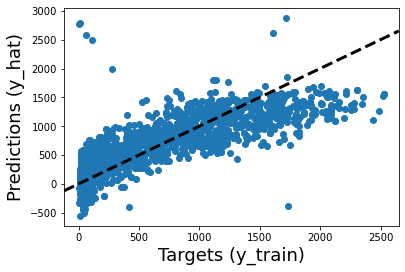

In [125]:
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

# 45 Grad Linie (ideales Modell)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

plt.show()

Residuals bzw. Fehlr (Zeilattribut - Vorhersage) scheint Normal verteilt zu sein. Das Model funktioniert:

C:\Users\qdoof\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


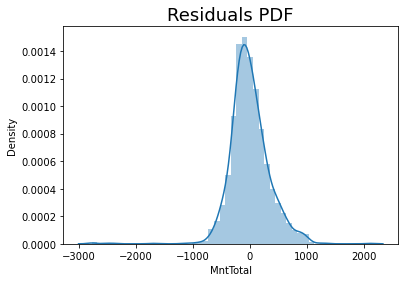

In [126]:
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

plt.show()

#### 5.6 Regression Metriken

In [127]:
reg.score(x_train,y_train) # R-squared for Goodness of Fit

0.6767221790321027

In [128]:
reg.intercept_ #(intercept)

610.724632736858

In [129]:
reg.coef_ #(coefficients)

array([   6.24059021, -128.47397417,  -99.35596041,  411.49764461,
          9.66770232,   23.04779947,    8.56822889,   13.14174428,
        -11.15633894,    2.22911736,   -0.71856243,    3.48291303])

In [130]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Year_Birth,6.240590
1,Kidhome,-128.473974
2,Teenhome,-99.355960
3,Income,411.497645
4,Education_Basic,9.667702
5,Education_Graduation,23.047799
6,Education_Master,8.568229
7,Education_PhD,13.141744
8,Marital_Status_Married,-11.156339
9,Marital_Status_Single,2.229117


#### 5.7 Testing

In [131]:
y_hat_test = reg.predict(x_test)

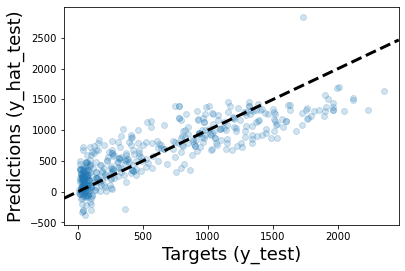

In [132]:
plt.scatter(y_test, y_hat_test, alpha=0.2) # Alpha for opacity
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

# 45 Grad Linie (ideales Modell)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

plt.show()